# Programming for Data Analytics - Project - Gerard Ball

> For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
• Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
• Investigate the types of variables involved, their likely distributions, and their relationships with each other.
• Synthesise/simulate a data set as closely matching their properties as possible.
• Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.
Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. 




## Road Map
1. Introduction 
2. Aim
3. Images of subjects
4. Data Collection
5. Data Synthesis
6. Exploratory Data Analysis
7. Data Visualisation
8. Statistical Analysis
9. Interpretations of results and Discussions
10. Conclusion


## Introduction

Roller coasters offer a budding adrenaline junkie a release from the trials and tribulations of everyday life. Like many things in life, coasters come in all manner of sizes and types and understanding and discerning the relatsionsip between much of them, can offer up some valuable data analysis. The mission of this project is to simulate and synthesize a diverse these roller coasters, capturing variables like speed, height, type and thrill rating. By carrying out this synthesis, the prtoject aims to create a comprehensive and varied representation of roller coasters worldwide and their many types. The dataset will serve as a valuable resource for analysis, providing insights into the relationships between different coaster characteristics. By leveraging this simulated data, I strive to enhance understanding and appreciation of the factors contributing to the thrill and excitement offered by these wonderful marvels of modern engineering whilst facilitating potential insights for enthusiasts, theme park planners and the amusement industry itself. 

## Data Synthesis


## Sources for synthesising coaster data; 

[StackAbuse, synthetic data using numpy and sckit learn](https://stackabuse.com/generating-synthetic-data-with-numpy-and-scikit-learn/)
[Stackoverflow eamples of similiar]()


In [87]:
import pandas as pd
import numpy as np

num_pints = 100
mycoasterdata = pd.DataFrame({
    'Roller Coaster': [f'Coaster_{i+1}' for i in range(num_pints)],
    'Type': np.random.choice(['Steel', 'Wooden', 'Hybrid'], size=num_pints),
    'Speed (kph)': np.random.normal(loc=100, scale=15, size=num_pints),
    'Height (m)': np.random.normal(loc=50, scale=15, size=num_pints),
})

# steel faster, taller more thrillin on average
steel_mask = mycoasterdata['Type'] == 'Steel'
mycoasterdata.loc[steel_mask, 'Speed (kph)'] += 20
mycoasterdata.loc[steel_mask, 'Height (m)'] += 10

mycoasterdata['Thrill Rating'] = (
    0.3 * mycoasterdata['Speed (kph)'] +
    0.4 * mycoasterdata['Height (m)'] +
    np.random.normal(loc=8, scale=1, size=num_pints)
)

mycoasterdata.to_csv('coasterss.csv', index=False)

In [88]:
import pandas as pd

mycoasterdata = pd.read_csv('coasterss.csv')
print(mycoasterdata)

   Roller Coaster    Type  Speed (kph)  Height (m)  Thrill Rating
0       Coaster_1  Hybrid    90.407953   46.874141      52.732452
1       Coaster_2   Steel   112.128892   17.854994      49.680660
2       Coaster_3  Hybrid   100.146945   40.871327      55.466685
3       Coaster_4  Wooden    96.112855   26.009571      45.268308
4       Coaster_5  Hybrid    80.003085   49.255749      52.532727
..            ...     ...          ...         ...            ...
95     Coaster_96  Hybrid   112.960108   59.927738      65.835734
96     Coaster_97   Steel   139.413089   56.295223      71.757308
97     Coaster_98  Wooden    89.421317   61.148056      56.810980
98     Coaster_99   Steel   121.760063   66.812642      72.205712
99    Coaster_100   Steel   124.532029   39.846016      61.664104

[100 rows x 5 columns]


In [89]:
import pandas as pd
synthesised_data = pd.read_csv('coasterss.csv')

# mean and median
mean = synthesised_data.mean()
median = synthesised_data.median()

print("Mean:")
print(mean)

print("\nMedian:")
print(median)

Mean:
Speed (kph)      106.713717
Height (m)        53.739509
Thrill Rating     61.649058
dtype: float64

Median:
Speed (kph)      104.802304
Height (m)        52.325983
Thrill Rating     61.137387
dtype: float64


/var/folders/dg/9958h0ld4fsbyrqhh8fl7t3r0000gn/T/ipykernel_4397/2618024873.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = synthesised_data.mean()
/var/folders/dg/9958h0ld4fsbyrqhh8fl7t3r0000gn/T/ipykernel_4397/2618024873.py:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = synthesised_data.median()


In [90]:
import pandas as pd
roller_coaster_data = pd.read_csv('Coasterss.csv')
grouped_data = roller_coaster_data.groupby('Type')
mean_values = grouped_data.mean()
median_values = grouped_data.median()

print("Mean values for each type:")
print(mean_values)

print("\nMedian values for each type:")
print(median_values)

Mean values for each type:
        Speed (kph)  Height (m)  Thrill Rating
Type                                          
Hybrid    96.374139   51.734809      57.923681
Steel    122.157326   60.058417      68.684706
Wooden   100.869265   49.376731      58.114049

Median values for each type:
        Speed (kph)  Height (m)  Thrill Rating
Type                                          
Hybrid    94.195241   49.319502      58.175156
Steel    124.571062   61.420527      69.962821
Wooden   100.638349   46.946381      58.200535


/var/folders/dg/9958h0ld4fsbyrqhh8fl7t3r0000gn/T/ipykernel_4397/3336080302.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_values = grouped_data.mean()
/var/folders/dg/9958h0ld4fsbyrqhh8fl7t3r0000gn/T/ipykernel_4397/3336080302.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_values = grouped_data.median()


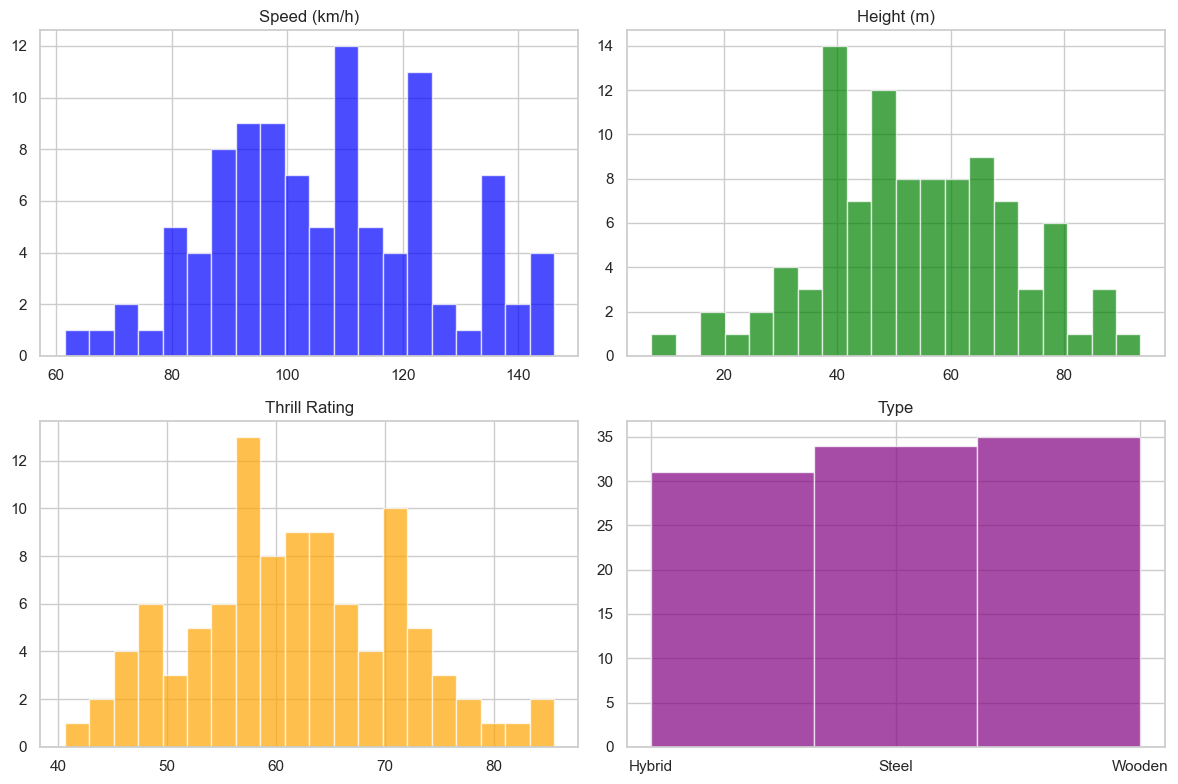

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
mycoasterdata = pd.read_csv('Coasterss.csv')

# Plot histograms for each variable
plt.figure(figsize=(12, 8))

# Speed
plt.subplot(2, 2, 1)
plt.hist(mycoasterdata['Speed (kph)'], bins=20, color='blue', alpha=0.7)
plt.title('Speed (km/h)')

# Height
plt.subplot(2, 2, 2)
plt.hist(mycoasterdata['Height (m)'], bins=20, color='green', alpha=0.7)
plt.title('Height (m)')

# Thrill Rating
plt.subplot(2, 2, 3)
plt.hist(mycoasterdata['Thrill Rating'], bins=20, color='orange', alpha=0.7)
plt.title('Thrill Rating')

# Type"
plt.subplot(2, 2, 4)
plt.hist(mycoasterdata['Type'], bins=3, color='purple', alpha=0.7)
plt.title('Type')

plt.tight_layout()
plt.show()

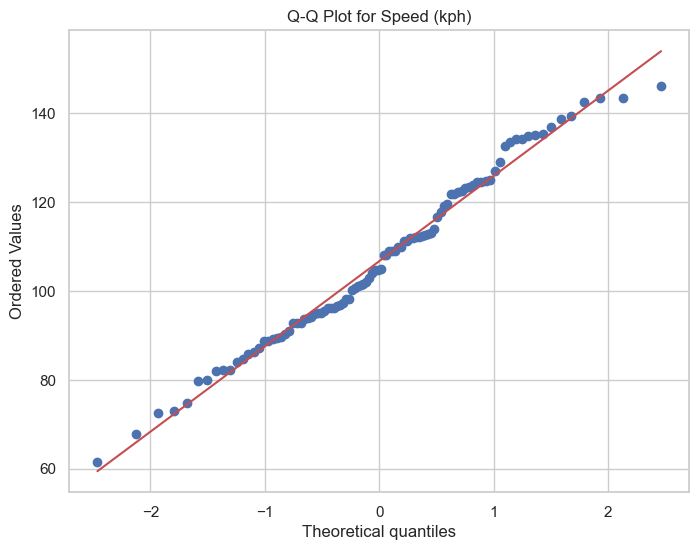

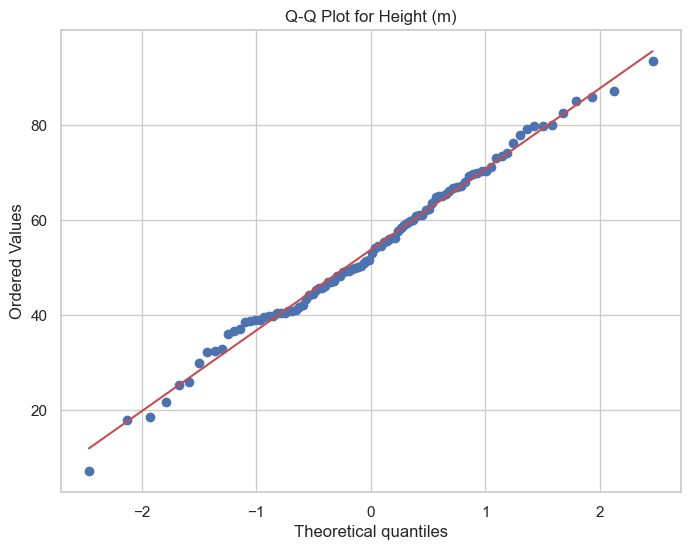

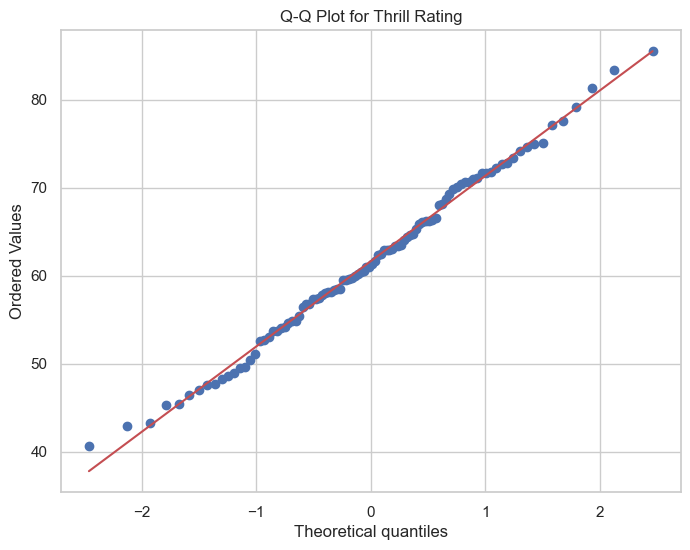

In [92]:
import matplotlib.pyplot as plt
from scipy.stats import probplot
import pandas as pd
mycoasterdata = pd.read_csv('coasterss.csv')

#numerical vars for Q-Q plots
numerical_vars = ['Speed (kph)', 'Height (m)', 'Thrill Rating']
for variable in numerical_vars:
    # Create Q-Q plot
    plt.figure(figsize=(8, 6))
    probplot(mycoasterdata[variable], dist='norm', plot=plt)
    plt.title(f'Q-Q Plot for {variable}')
    plt.show()

From using histograms of all variables within my synthersised dataset as well as qq plots of the 3 numerical variables - Speed, Height and Thrill follow a mostly Normal Distribution. This was determined was viewing a bell curve and somewhat symmetrical outline. Calculating and observing means and medians (for which are either idential or very close) was also used for a clue as normal distributions should have the same median and mean values or as close to the same as possible. The type variable is a categorical variable. It is such because it reprrsents the following: 
"The categories are discrete.
There are two or more potential categories.
The probability that the random variable takes on a value in each category must be between 0 and 1.
The sum of the probabilities for all categories must sum to 1" - [Statology, Statistics Simplifid](https://www.statology.org/categorical-distribution/)

In [102]:
import pandas as pd


mycoasterdata = pd.read_csv('Coasterss.csv')

# var ypes determie my var types. oroller coaster and types vars are object strings so should be categorical whereas speed, height and thrill rating are showing floats which is numerical.
print(roller_coaster_data.dtypes)

Roller Coaster     object
Type               object
Speed (kph)       float64
Height (m)        float64
Thrill Rating     float64
dtype: object


In [111]:
import pandas as pd
mycoasterdata = pd.read_csv('coasterss.csv')
numerical_vars = mycoasterdata[['Speed (kph)', 'Height (m)', 'Thrill Rating']]
correlation_matrix = numerical_vars.corr()

#correlation matrix
print(correlation_matrix)

               Speed (kph)  Height (m)  Thrill Rating
Speed (kph)       1.000000    0.212685       0.724718
Height (m)        0.212685    1.000000       0.820049
Thrill Rating     0.724718    0.820049       1.000000


. The above correlation coefficient was done for the 3 numerical vars. The results show that speed and height have a coefficient of 0.074 which indicates a positive relationship, albeit only just. The 'real' data would likely have a higher relationship between height and speed than this - so I must not have coded the parameters as accurately as needed. Still, this indicates that there is a slight relationship that the taller the roller coaster, the faster it is. 

Speed and thrill rating maintain a very strong positive correlation of 0.713 which indicates that the faster the roller coaster is, the higher its thrill rating generally is.

Height and thrill rating share the strongest positive coefficient at 0.742 which indicates that the taller the coaster, the higher its thrill rating generally is. All very logical besides a lower than expected coefficient for the variables speed and height with only a positive correlation coefficient of 0.07. Would expect it to be given I know the nature of the 'rea;' data. Will analyse 'real' data thoroughly later to determine how close the synthesided dataset aligns with it. 

In [112]:
import pandas as pd
mycoasterdata = pd.read_csv('coasterss.csv')

stats = mycoasterdata.groupby('Type').describe()

# Display the descriptive statistics
print(stats)

       Speed (kph)                                                            \
             count        mean        std        min         25%         50%   
Type                                                                           
Hybrid        31.0   96.374139  16.691151  61.439258   86.518019   94.195241   
Steel         34.0  122.157326  16.534568  79.729984  112.157211  124.571062   
Wooden        35.0  100.869265  13.121294  73.055829   94.213169  100.638349   

                               Height (m)             ...             \
               75%         max      count       mean  ...        75%   
Type                                                  ...              
Hybrid  108.554065  136.850269       31.0  51.734809  ...  60.940828   
Steel   134.697130  146.170660       34.0  60.058417  ...  70.186580   
Wooden  111.590587  123.807619       35.0  49.376731  ...  60.490901   

                  Thrill Rating                                             \
        

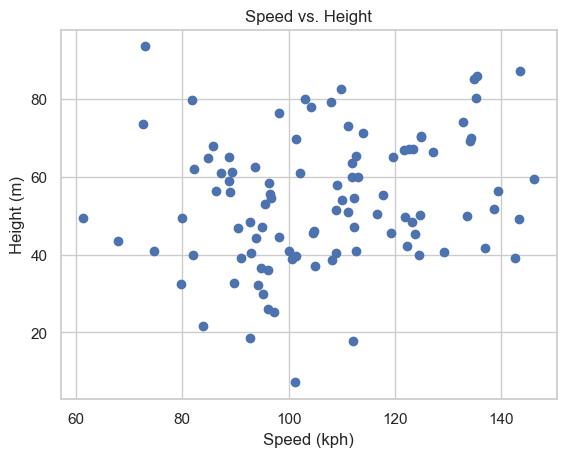

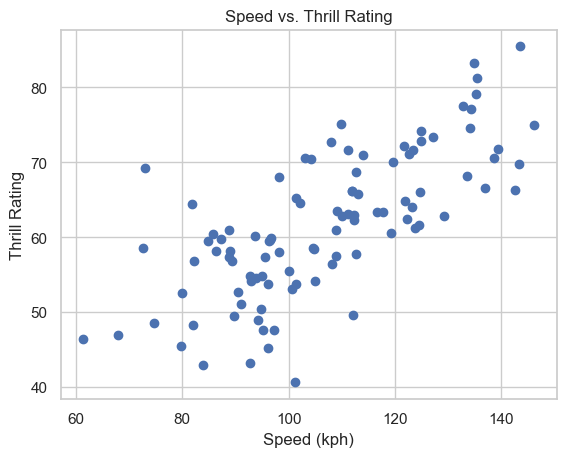

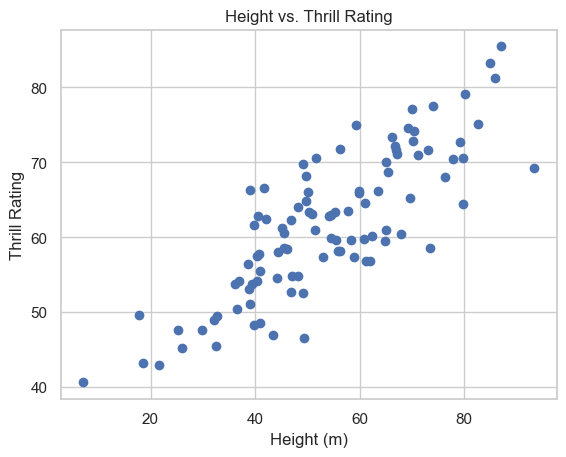

In [113]:
import matplotlib.pyplot as plt
import pandas as pd


mycoasterdata = pd.read_csv('Coasterss.csv')

plt.scatter(mycoasterdata ['Speed (kph)'], mycoasterdata['Height (m)'])
plt.title('Speed vs. Height')
plt.xlabel('Speed (kph)')
plt.ylabel('Height (m)')
plt.show()


plt.scatter(mycoasterdata ['Speed (kph)'], mycoasterdata['Thrill Rating'])
plt.title('Speed vs. Thrill Rating')
plt.xlabel('Speed (kph)')
plt.ylabel('Thrill Rating')
plt.show()

plt.scatter(mycoasterdata ['Height (m)'], mycoasterdata['Thrill Rating'])
plt.title('Height vs. Thrill Rating')
plt.xlabel('Height (m)')
plt.ylabel('Thrill Rating')
plt.show()

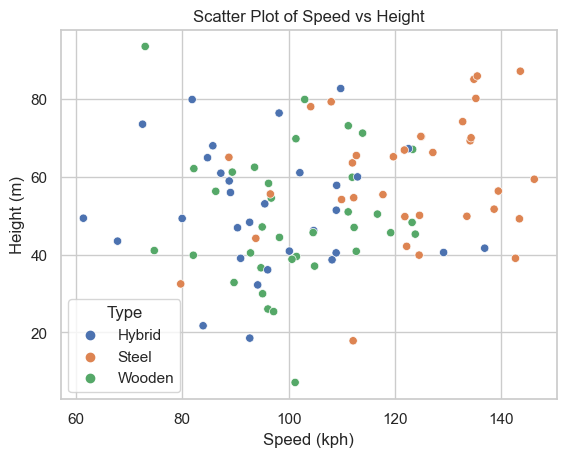

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

mycoasterdata = pd.read_csv('Coasterss.csv')

# Scatters based off type var for Speed and Height
sns.scatterplot(x='Speed (kph)', y='Height (m)', hue='Type', data=mycoasterdata)
plt.title('Scatter Plot of Speed vs Height')
plt.show()

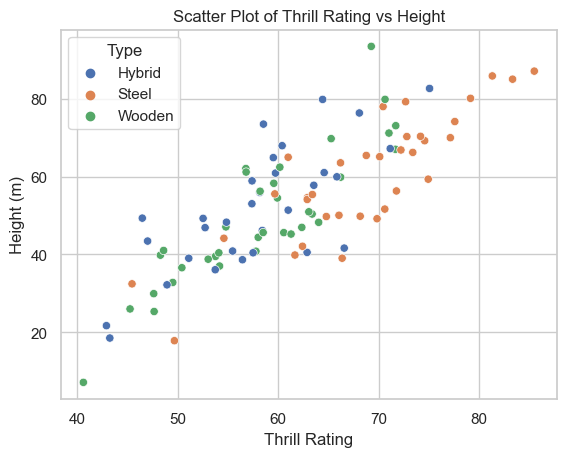

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

mycoasterdata = pd.read_csv('Coasterss.csv')

# Scatters based off type var for Thrill Rating and Height
sns.scatterplot(x='Thrill Rating', y='Height (m)', hue='Type', data=mycoasterdata)
plt.title('Scatter Plot of Thrill Rating vs Height')
plt.show()

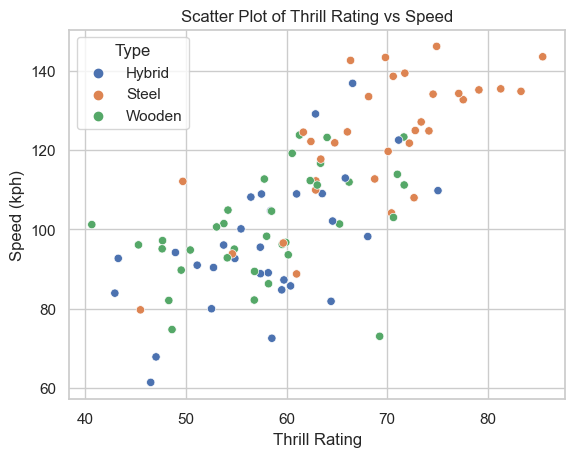

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

mycoasterdata = pd.read_csv('Coasterss.csv')

# Scatters based off type var for Speed and Thrill Rating
sns.scatterplot(x='Thrill Rating', y='Speed (kph)', hue='Type', data=mycoasterdata)
plt.title('Scatter Plot of Thrill Rating vs Speed')
plt.show()

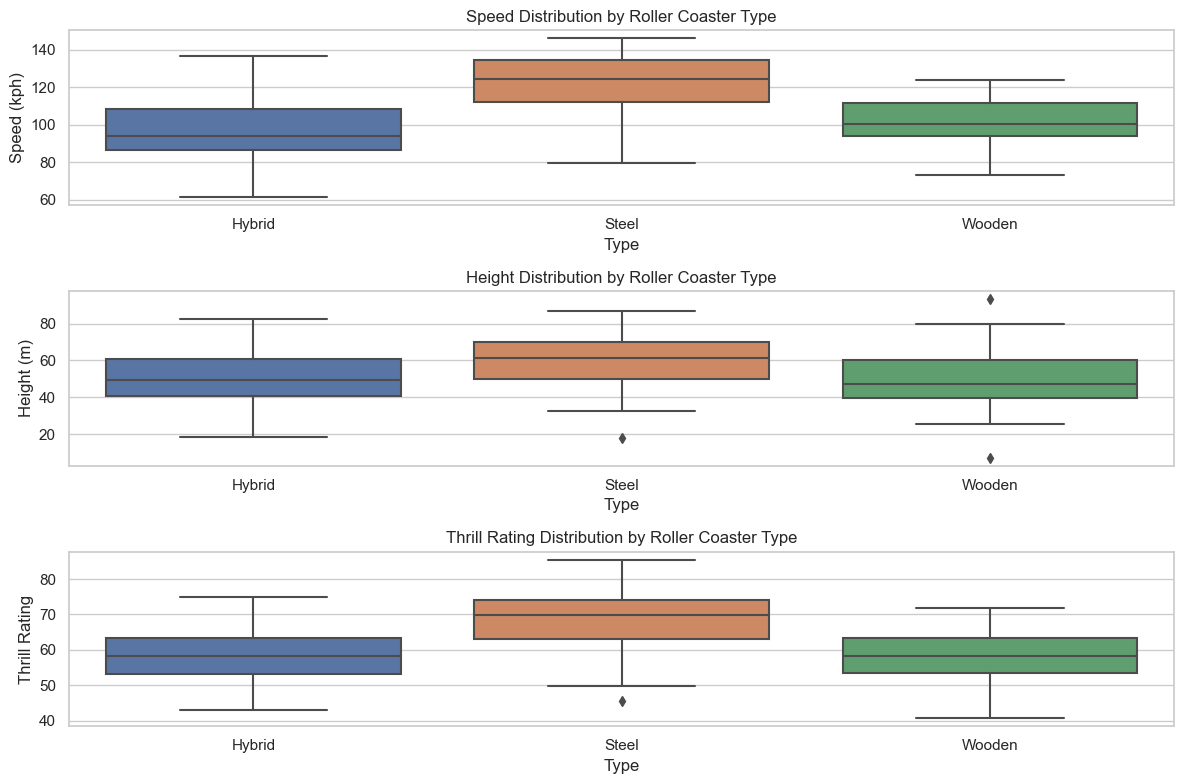

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


mycoasterdata = pd.read_csv('coasterss.csv')


sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Box plot Speed for type
plt.subplot(3, 1, 1)
sns.boxplot(x='Type', y='Speed (kph)', data=mycoasterdata)
plt.title('Speed Distribution by Roller Coaster Type')

# Height by T
plt.subplot(3, 1, 2)
sns.boxplot(x='Type', y='Height (m)', data=mycoasterdata)
plt.title('Height Distribution by Roller Coaster Type')

# Box plotThrill R by Type
plt.subplot(3, 1, 3)
sns.boxplot(x='Type', y='Thrill Rating', data=mycoasterdata)
plt.title('Thrill Rating Distribution by Roller Coaster Type')
plt.tight_layout()
plt.show()

### Below Linear Regression code mostly gotten from example at[sckit-learn.org](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html). Didn't really know how to do this and found it very hard. 

Coefficients:  [0.28972724 0.40269103]
Mean squared error: 0.68
Coefficient of determination: 0.99


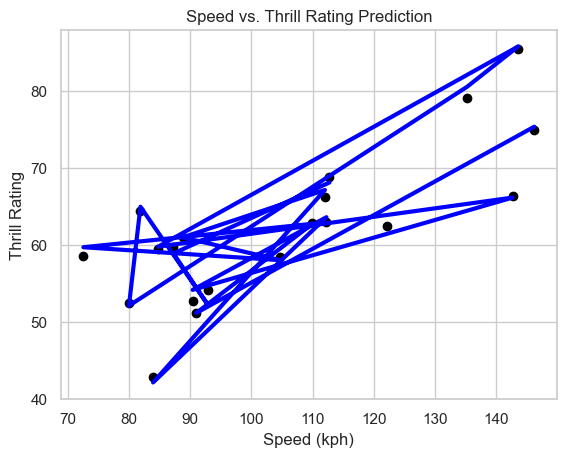

In [118]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
mycoasterdata = pd.read_csv('coasterss.csv')

features = mycoasterdata[['Speed (kph)', 'Height (m)']]
target = mycoasterdata['Thrill Rating']

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

regr = LinearRegression()

# Train model
regr.fit(X_train, y_train)

# predictions for testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: ", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Ploting
plt.scatter(X_test['Speed (kph)'], y_test, color="black")
plt.plot(X_test['Speed (kph)'], y_pred, color="blue", linewidth=3)

plt.xlabel('Speed (kph)')
plt.ylabel('Thrill Rating')
plt.title('Speed vs. Thrill Rating Prediction')

plt.show()